## Projeto Classificado de vinhos tintos
integrantes: Roberto Schnorrenberg e Raphael Butori - Turma B

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Objetivo:

A partir de um dataset de quality, em relação com as informações de cada vinho tinto analisado no dataset, será construido, nesse projeto, uma regressão, além da utilização dos algoritmos Random Forest e Gradient Boosting, que avalie cada vinho decorrente de suas informações principais (base de dados).

In [2]:
dados1=pd.read_csv('wine_quality.csv')

In [3]:
def limpeza(x):
    for y in range(len(x)-1):
        i=0
        seguidos=0
        for z in x.columns:
            if x[z][y+1]==x[z][y-seguidos]:
                i+=1
        if i==len(x.columns):
            x.drop(index=y,inplace=True)
            seguidos+=1
        else:
            seguidos=0

In [4]:
limpeza(dados1)

In [5]:
dados1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
dados=dados1[0:round((len(dados1))*.75)]
dadost=dados1[round((len(dados1))*.75):]

## Análise exploratória dos dados

In [7]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,8.612909,0.520234,0.292414,2.558709,0.089513,15.341291,47.309461,0.997052,3.298267,0.667542,10.379399,5.656941
std,1.764044,0.179039,0.195915,1.245838,0.049275,10.256458,34.274990,0.001862,0.155447,0.178764,1.094455,0.812999
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.300000,0.390000,0.120000,1.900000,0.071000,7.000000,22.000000,0.996000,3.200000,0.560000,9.500000,5.000000
50%,8.300000,0.500000,0.280000,2.200000,0.080000,13.000000,38.000000,0.997000,3.300000,0.620000,10.000000,6.000000
75%,9.600000,0.630000,0.450000,2.700000,0.092000,21.000000,63.000000,0.998150,3.390000,0.740000,11.000000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


### Histogramas

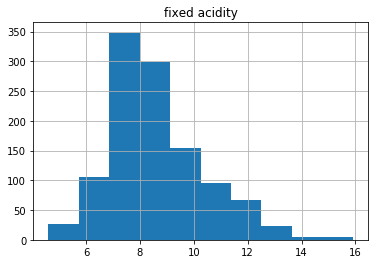

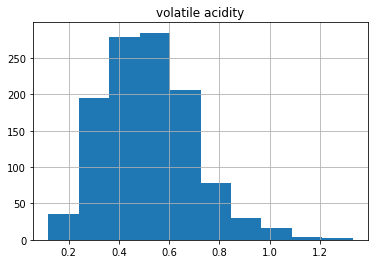

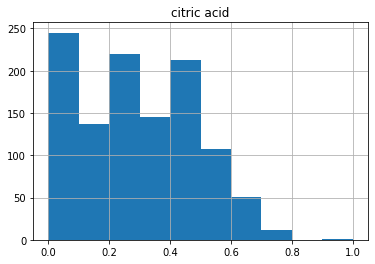

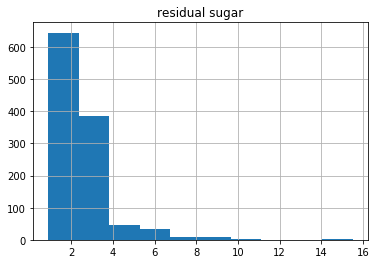

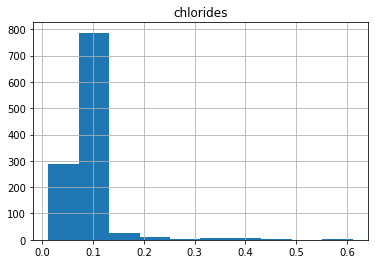

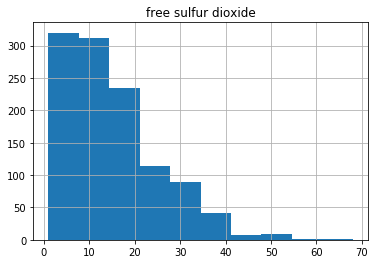

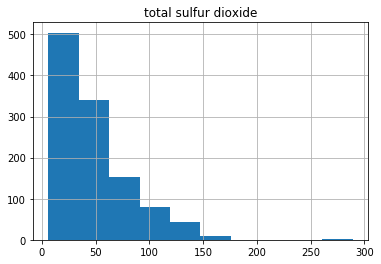

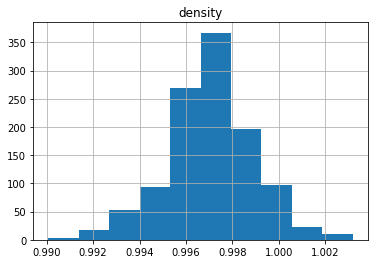

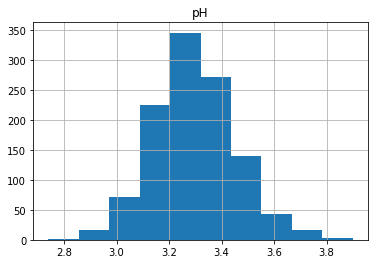

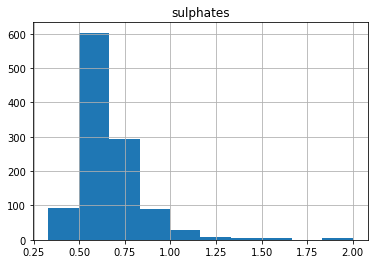

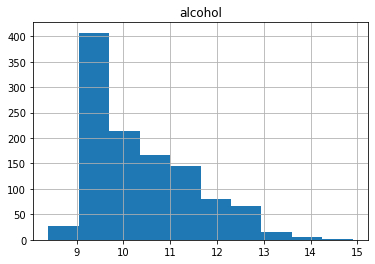

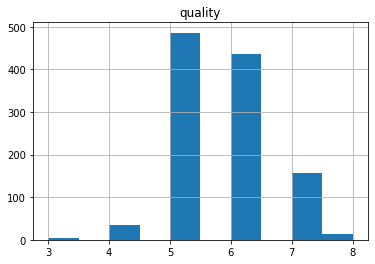

In [8]:
for x in dados.columns:
    dados.hist(column=x)

### Boxplot

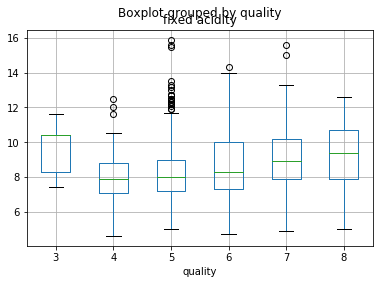

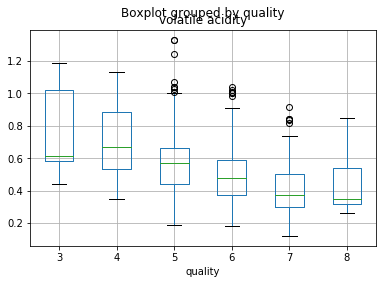

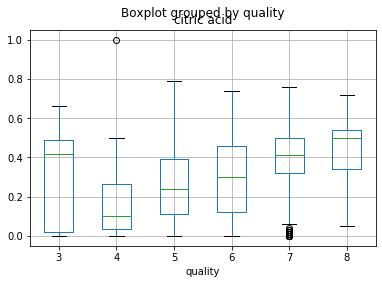

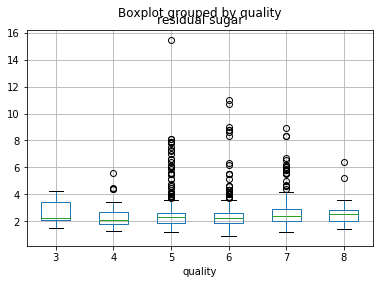

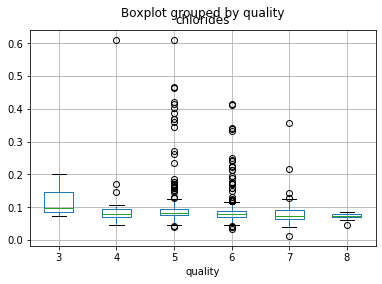

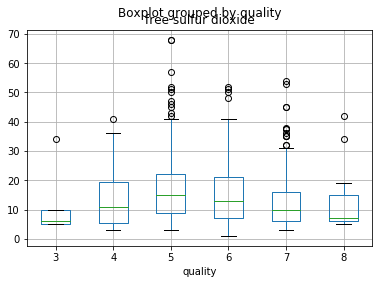

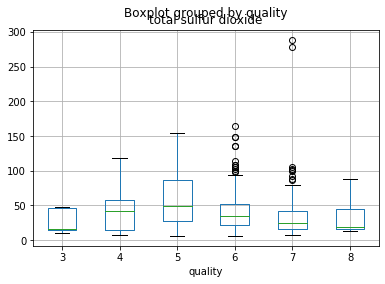

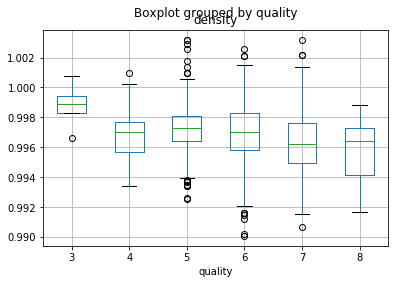

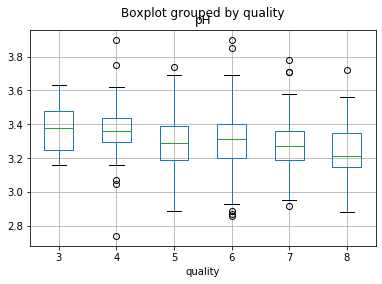

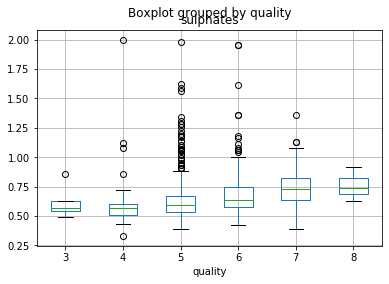

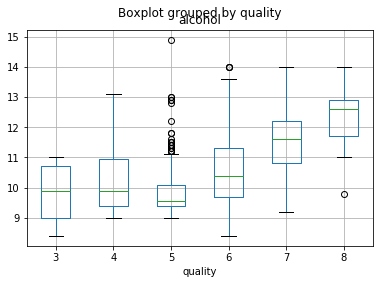

In [9]:
for x in dados.columns:
    if x!='quality':
        dados.boxplot(column=x,by='quality');#subplots

###### observação dos boxplots
Observando bem os boxplots podemos perceber algumas características decorrentes dos vinhos com uma avaliação melhor que o normal, como por exemplo, no Boxplot da "quality" em relação com a "fixed acidity" é possível discernir que um vinho tinto bom com alta avaliação possui um grau um pouco maior de acidez em sua constituição, quando sua linha verde representando a mediana está presente acima das demais.

Onde podemos aobservar com mais clareza no Boxplot da relação da "quality" com o "alcohol", nesse quadrante fica explicito que um vinho mais bem avaliado possui um nível alcoolico mais elevado. E portanto, além desse Boxplot outros como os das variáveis "sulphates"e "citric acids" tamém possuem a mesma relação, ou seja, quanto mais "sulphates" e "citric acids" melhor será a nota do vinho em questão.

Por outro lado apresenta-se o inverso desse caso descrito acima. Ou seja, para algumas variáveis como "volatile acidity", "chlorides", "density" e "pH" se tem um processo contrário, onde quanto menor a quantidade dessas variáveis estiverem presentes no vinho em questão melhor será sua nota.

In [10]:
np.sum(dados.isnull())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Observação das correlações entre as variáveis
Criação de um gráfico afim de observar as correlações entre as variáveis da base de dados, ou seja, utilizada para a percepção de altas e baixas correlações para que assim seja possível a tomada de decissões acerca de por exemplo a permanência ou não de uma variável no dataset.

In [11]:
teste=dados.corr()

In [12]:
n = teste.shape[0]
teste.iloc[range(n),range(n)]= float('NaN')

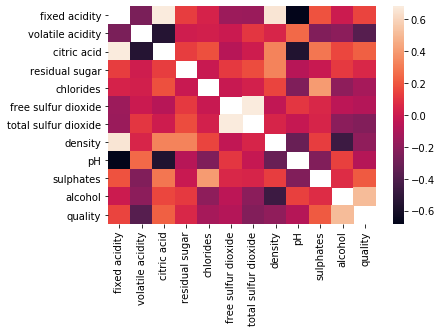

In [13]:
heatmap(teste);

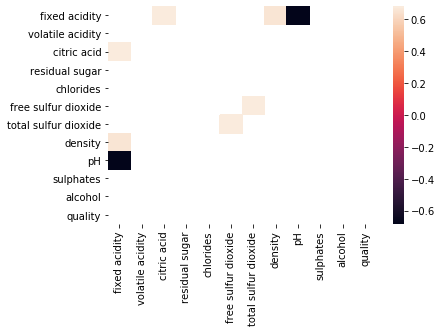

In [14]:
teste1=teste[(teste.abs()>0.6)&(teste<1)]
heatmap(teste1);

#### Função
Realizando a função da regressão que será utilizada para gerar os summary necessários para análise das variáveis.

In [15]:
def regressao(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

### Limpeza de variáveis desnecessárias
Uma correlação muito alta e um "valor p" também alto acabam por desgastar o bom resultado da regressão realizada, portanto, é necessário a remoção das variáveis que apresentem essas características.

Diante disso, pode ser observado um alto "valor p" para a variável "density", além de uma alta correlação com a variável "fixed acidity", o que proporciona sua retirada da regressão, visando uma melhor acurácia ao fim do projeto.

Ao comparar as correlações julgamos necessária a retirada de variáveis que apresentem uma correlação muito alta entre as mesmas, na base a ser utilizada , o mesmo ocorre para a variável "fixed acidity" que posssui uma correlação muito alta em relação com as variáveis "density", "pH" e principalmente com "citric acid". Portanto, deve ser realizada a remoção desta variável da base de dados afim de estabelecer um resultado mais congruente após a regressão.

Outra simplificação cabivel é a retirada da variável "residual suagar" que apresenta um "valor p" de 0.434, sendo assim comsiderado um resultado maior que o cabível, portanto sua remoção não deve ser ignorada. 

Outra simplificação que não pode ser ignorada se deve a retirada da variável "ctric acid" que se correlaciona diretamente com a variável "fixed acidity" e possui um "valor p" acima do normal (0.288), justificando assim o abandono dessa variável para com a base de dados. 

In [16]:
def limpavar(df,varint):
    l=[]
    for x in df.columns:
        if x!=varint:
            l.append(x)
    maiorf=1
    while maiorf>0.1:
        results=regressao(df[l],df[varint])
        i=0
        imaior=0
        maior=0
        while i < len(results.pvalues):
            if results.pvalues[i]>maior:
                maior=results.pvalues[i]
                imaior=i
            i+=1
        maiorf=maior
        if maior>0.1:
            l.pop(imaior-1)
    results.summary()
    return l

In [17]:
l1=limpavar(dados,'quality')

In [18]:
results=regressao(dados[l1],dados['quality'])

In [19]:
def dropcol(x,l):
    for y in x.columns:
        if y not in l and y!='quality':
            x.drop(columns=[y],inplace=True)

In [20]:
dropcol(dadost,l1)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Regressão Linear Múltipla
A análise da regressão tem por objetivo desvendar o comportamento entre uma variável dependente e as independentes. Modelos matemáticos são capazes de explicar essa relação por meio de uma equção que correlaciona a variável dependente com as independentes. É valido resaltar que a análise da regressão não garante que as variáveis explicativas sejam a causa da variável independente.

Nese caso, pode-se utilizar uma regressão linear multipla, buscando explicar a ocorrência da variável dependente em questão. 

Regressão múltipla é uma coleção de técnicas estatísticas para construir modelos que descrevem de maneira razoável relações entre várias variáveis explicativas de um determinado processo. A diferença entre a regressão linear simples e a múltipla é que na múltipla são tratadas duas ou mais variáveis explicativas.

In [21]:
#predict#random-forest
def qtest(df):
    df.reset_index(inplace=True)
    if 'index' in df.columns:
        df.drop(columns=['index'])
    df['qualiteste_rlm']=results.params['const']+results.params['volatile acidity']*df['volatile acidity']\
                    +results.params['chlorides']*df['chlorides']\
                    +results.params['total sulfur dioxide']*df['total sulfur dioxide']\
                    +results.params['pH']*df['pH']\
                    +results.params['sulphates']*df['sulphates']\
                    +results.params['alcohol']*df['alcohol']


In [22]:
qtest(dadost)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


#### Round
Neste projeto é indispensavel a utilização do Round que disponibiliza o arredondamento de uma variável "float", portanto como nossos resultados gerados que foram gerados na regressão e que serão gerados no Random Forest acabam por não serem números inteiros é necessário o arredondamento deles com intuito comparativo.

In [23]:
dadost=dadost.assign(qualiround_rlm=round(dadost['qualiteste_rlm']))

#### Quantidade de acertos e erros
Nesta estapa realizamos a contagem de acertos e erros brutos com intuito comparativo para com eles gerar a probabilidade de acerto para a regressão multipla, ou seja, para gerar a acurácia do método utilizado.

In [24]:
def verify (df,tipo):
    df['acertos'+tipo]=0
    for x in range(len(dadost)):
        if dadost['quality'][x]==dadost['qualiround'+tipo][x]:
            dadost['acertos'+tipo][x]='ta certo'
        else:
            dadost['acertos'+tipo][x]='ta serto'

In [25]:
verify(dadost,'_rlm')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [26]:
dadost.head()

,index,volatile acidity,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality,qualiteste_rlm,qualiround_rlm,acertos_rlm
0,1192,0.250,0.063,41.0,3.52,0.80,12.4,7,6.637135,7.0,ta certo
1,1193,0.885,0.166,12.0,3.56,0.51,10.8,5,5.180584,5.0,ta certo
2,1194,0.745,0.114,64.0,3.22,0.59,9.5,6,5.035882,5.0,ta serto
3,1195,0.430,0.078,56.0,3.52,0.60,9.5,6,5.345183,5.0,ta serto
4,1196,0.580,0.076,94.0,3.21,0.58,9.5,6,5.177851,5.0,ta serto


### Desvio Padrão 
Foi realizado abaixo uma função que acaba por apresentar uma tolerância maior sobre os erros tanto na regressão quanto no arredondamento dos "outputs". Dessa forma, a função acaba por considerar um valor com diferença de até 1 do valor correspondente considerando este um acerto e não mais um erro.

Por exemplo, se um dos outputs observado foi de uma qualidade originária de nota 5 e o resultado após a regressão foi uma nota 6 ou 4 este resultado será considerado como um acerto e não mais como um erro, como considerado na função acima.

Tem como objetivo esta etapa gerar uma tolêrancia maior aos resultados obtidos pela regressão e também observar se os erros contemplados anteriormente sem o desvio padrão são erros que são coerentes e não muito distantes da nota original ou se são erros completamentes abruptus e muito distantes do valor real, portanto, como observamos que como a quntidade de erros utilizando o desvio padrão acaba por ficar bem menor consideramos que os erros estão controlados e dentro do normal.

In [27]:
def tolerancia(df,tipo):  
    df['+-1'+tipo]=0
    for x in range(len(dadost)):
        if math.ceil(df['qualiteste'+tipo][x])==df['quality'][x] or math.floor(df['qualiteste'+tipo][x])==df['quality'][x]:
            dadost['+-1'+tipo][x]='ta certo'
        else:
            dadost['+-1'+tipo][x]='ta serto'

In [28]:
tolerancia(dadost,'_rlm')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Classificando arredondamentos
Como foi observado, neste projeto é indispensável o arredondamento dos "outputs" reproduzidos para qualquer método de presição utilizado, porém desta forma acaba-se por ser neessário realizar arredondamentos mais "claros" do que outros. Dessa maneira classificamos os arredondamentos de três maneiras os arredondamentos de clareza "alta", "média" e "baixa".

Um arredondamento "fácil" seria um arredondamneto que está mais perto do valor do número inteiro, como por exemplo os números 5.01 e 7.98. Estes valores estão bem perto dos respectivos números 5 e 8, portanto serão considerados como um arredondamento de certeza "alta".

Um arredondamento "médio" seria um arredondamneto que está mais ou menos perto do valor do número inteiro, como por exemplo os números 5.3 e 7.82. Estes valores estão a uma dsitância razoavel dos respectivos números 5 e 8, mas ainda são arredondamentos simples que são facilmente observados, portanto serão considerados como um arredondamento de certeza "média".

Um arredondamento "dificíl" seria um arredondamneto que está mais longe do valor do número inteiro, como por exemplo os números 5.52 e 7.5. Estes valores estão bem longe dos respectivos números 5 e 8 e podem ser facilmente confundidos seus arredondamentos, portanto serão considerados como um arredondamento de certeza "baixa".

In [29]:
def certeza_de_arredondamento(df, tipo):
    df['certeza'+tipo]=0
    for x in range(len(df)):
        if abs(df['qualiround'+tipo][x]-df['qualiteste'+tipo][x])>(2*.5/3)  :
            df['certeza'+tipo][x]='baixa'
        elif abs(df['qualiround'+tipo][x]-df['qualiteste'+tipo][x])>(.5/3):
            df['certeza'+tipo][x]='média'
        else: 
            df['certeza'+tipo][x]='alta'

In [30]:
certeza_de_arredondamento(dadost,'_rlm')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [31]:
dadost.head()

,index,volatile acidity,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality,qualiteste_rlm,qualiround_rlm,acertos_rlm,+-1_rlm,certeza_rlm
0,1192,0.250,0.063,41.0,3.52,0.80,12.4,7,6.637135,7.0,ta certo,ta certo,baixa
1,1193,0.885,0.166,12.0,3.56,0.51,10.8,5,5.180584,5.0,ta certo,ta certo,média
2,1194,0.745,0.114,64.0,3.22,0.59,9.5,6,5.035882,5.0,ta serto,ta certo,alta
3,1195,0.430,0.078,56.0,3.52,0.60,9.5,6,5.345183,5.0,ta serto,ta certo,baixa
4,1196,0.580,0.076,94.0,3.21,0.58,9.5,6,5.177851,5.0,ta serto,ta certo,média


### Acurácias
Aqui medimos o quão coerente é o nosso método de predição, observando a probabilidade de acertos que o método obteve. Neste caso, foi utilizado a regressão multipla que portanto está gerando uma acurácia de 62.07% e uma acurácia de 86.21% com a tolerância.

In [32]:
def precisao(df,tipo, txt):
    ac = df['acertos'+tipo].value_counts()
    precisão=ac['ta certo']/ac.sum()
    print('Precisão da regressão '+txt+':',round(float(precisão*100),2),'%')

In [33]:
precisao(dadost,'_rlm','linear múltipla')

Precisão da regressão linear múltipla: 62.07 %


In [34]:
def tolerancia_count(df,tipo):
    tol=dadost['+-1'+tipo].value_counts()
    tolerância_de_1_estrela=tol['ta certo']/tol.sum()
    print('Com tolerância aumentada para +-1 estrela :',round(float(tolerância_de_1_estrela*100),2),'%')

In [35]:
tolerancia(dadost,'_rlm')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [36]:
baixa=dadost.loc[dadost['certeza_rlm']=='baixa']
media=dadost.loc[dadost['certeza_rlm']=='média']
alta=dadost.loc[dadost['certeza_rlm']=='alta']

###### Acertos e erros considerando o nível de certeza do arredondamento "baixa"

In [37]:
bx=baixa['acertos_rlm'].value_counts()
print('Probabilidade de acerto para certeza baixa:',round((bx['ta certo']/bx.sum())*100,2),'%')

Probabilidade de acerto para certeza baixa: 59.52 %


###### Acertos e erros considerando o nível de certeza do arredondamento "média"

In [38]:
md=media['acertos_rlm'].value_counts()
print('Probabilidade de acerto para certeza média:',round((md['ta certo']/md.sum())*100,2),'%')

Probabilidade de acerto para certeza média: 62.9 %


###### Acertos e erros considerando o nível de certeza do arredondamento "alta"

In [39]:
at=alta['acertos_rlm'].value_counts()
print('Probabilidade de acerto para certeza alta:',round((at['ta certo']/bx.sum())*100,2),'%')

Probabilidade de acerto para certeza alta: 64.29 %


## Random Forest

Random Forest significa floresta aleatória. Este nome explica muito bem o funcionamento do algoritmo, que irá criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore será utilizada na escolha do resultado final.

###### Árvores de Decisão (Decision Trees)

As Árvores de Decisão, ou Decision Trees, estabelecem regras para tomada de decisão. O algoritmo criará uma estrutura similar a um fluxograma, com "nós" onde uma condição é verificada, e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, até a finalização da árvore. Com os dados de treino, o algoritmo busca as melhores condições, e onde inserir cada uma dentro do fluxo.

In [40]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(dados[l1],dados['quality'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [41]:
pred= rf.predict(dadost[l1])

In [42]:
dadost['qualiteste_rf']=0
dadost=dadost.assign(qualiteste_rf=pred)

##### Round

In [43]:
dadost=dadost.assign(qualiround_rf=round(dadost['qualiteste_rf']))

In [44]:
verify(dadost, '_rf')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


#### Desvio Padrão
O mesmo desvio padrão utilizado na regressão, porém agora para o Random Forest.

In [45]:
tolerancia(dadost,'_rf')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


#### Classificando arredondamentos
A mesma classificação utilizada na regressão, porém agora para o Random Forest.

In [46]:
certeza_de_arredondamento(dadost, '_rf')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [47]:
dadost.head()

,index,volatile acidity,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality,qualiteste_rlm,qualiround_rlm,acertos_rlm,+-1_rlm,certeza_rlm,qualiteste_rf,qualiround_rf,acertos_rf,+-1_rf,certeza_rf
0,1192,0.250,0.063,41.0,3.52,0.80,12.4,7,6.637135,7.0,ta certo,ta certo,baixa,6.721,7.0,ta certo,ta certo,média
1,1193,0.885,0.166,12.0,3.56,0.51,10.8,5,5.180584,5.0,ta certo,ta certo,média,4.880,5.0,ta certo,ta certo,alta
2,1194,0.745,0.114,64.0,3.22,0.59,9.5,6,5.035882,5.0,ta serto,ta certo,alta,5.010,5.0,ta serto,ta certo,alta
3,1195,0.430,0.078,56.0,3.52,0.60,9.5,6,5.345183,5.0,ta serto,ta certo,baixa,5.358,5.0,ta serto,ta certo,baixa
4,1196,0.580,0.076,94.0,3.21,0.58,9.5,6,5.177851,5.0,ta serto,ta certo,média,5.049,5.0,ta serto,ta certo,alta


### Acurácias
Aqui medimos o quão coerente é o nosso método de predição, observando a probabilidade de acertos que o método obteve. Neste caso, foi utilizado o algoritmo do Random Forest que portanto está gerando uma acurácia de 59.15% e uma acurácia de 88.33% com a tolerância.

In [48]:
precisao(dadost, '_rf','por random forest')

Precisão da regressão por random forest: 59.15 %


In [49]:
tolerancia_count(dadost, '_rf')

Com tolerância aumentada para +-1 estrela : 88.33 %


## Gradient Boosting
Além do Random Forest também usaremos o Gradient Boosting como outro algoritmo afim de produzir um resultado mais apurado na classificação dos vinhos em relação aos outros métodos.

O gradient boosting é uma técnica de aprendizado de máquina para problemas de regressão e classificação, que produz um modelo de previsão na forma de um ensemble (conjunto estatístico) de modelos de previsão fracos, geralmente árvores de decisão. Ela constrói o modelo em etapas, como outros métodos de boosting, e os generaliza, permitindo a otimização de uma função de perda diferenciável arbitrária.

O princípio que está por trás de qualquer algoritmo de Boosting é a combinação do resultado de muitos classificadores (ou regressores) fracos, se combinando para formar uma espécie de comitê forte de decisão. Embora não haja restrições quanto a estes classificadores e regressores, é usual a utilização de árvores.

In [50]:
params_gb = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [51]:
reg = ensemble.GradientBoostingRegressor(**params_gb)
reg.fit(dados[l1], dados['quality'])

mse = mean_squared_error(dadost['quality'], reg.predict(dadost[l1]))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.4598


In [52]:
test_score = np.zeros((params_gb['n_estimators'],), dtype=np.float64)
for i, dadost['qualiteste_gb'] in enumerate(reg.staged_predict(dadost[l1])):
    test_score[i] = reg.loss_(dadost['quality'], dadost['qualiteste_gb'])

##### Round

In [53]:
dadost=dadost.assign(qualiround_gb=round(dadost['qualiteste_gb']))

In [54]:
verify(dadost, '_gb')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Desvio Padrão

In [55]:
tolerancia(dadost,'_gb')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


##### Classificando arredondamentos

In [56]:
certeza_de_arredondamento(dadost, '_gb')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [57]:
dadost.head()

,index,volatile acidity,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality,qualiteste_rlm,qualiround_rlm,...,qualiteste_rf,qualiround_rf,acertos_rf,+-1_rf,certeza_rf,qualiteste_gb,qualiround_gb,acertos_gb,+-1_gb,certeza_gb
0,1192,0.250,0.063,41.0,3.52,0.80,12.4,7,6.637135,7.0,...,6.721,7.0,ta certo,ta certo,média,6.669098,7.0,ta certo,ta certo,média
1,1193,0.885,0.166,12.0,3.56,0.51,10.8,5,5.180584,5.0,...,4.880,5.0,ta certo,ta certo,alta,4.702505,5.0,ta certo,ta certo,média
2,1194,0.745,0.114,64.0,3.22,0.59,9.5,6,5.035882,5.0,...,5.010,5.0,ta serto,ta certo,alta,5.107879,5.0,ta serto,ta certo,alta
3,1195,0.430,0.078,56.0,3.52,0.60,9.5,6,5.345183,5.0,...,5.358,5.0,ta serto,ta certo,baixa,5.284332,5.0,ta serto,ta certo,média
4,1196,0.580,0.076,94.0,3.21,0.58,9.5,6,5.177851,5.0,...,5.049,5.0,ta serto,ta certo,alta,5.095588,5.0,ta serto,ta certo,alta


### Acurácias
Aqui medimos o quão coerente é o nosso método de predição, observando a probabilidade de acertos que o método obteve. Neste caso, foi utilizado o algoritmo do Gradient Boosting que portanto está gerando uma acurácia de 57.03% e uma acurácia de 89.12% com a tolerância.

In [58]:
precisao(dadost, '_gb','por Gradient Boosting')

Precisão da regressão por Gradient Boosting: 57.03 %


In [59]:
tolerancia_count(dadost, '_gb')

Com tolerância aumentada para +-1 estrela : 89.12 %


###### Junção das predições

Com os resultados das três predições em mãos, foi gerado um gráfico com intuito comparativo entre os métodos utilizados que apresenta a quantidade de acertos que cada respectivo método obteve em cada nota de qualidade dos vinhos apresentados na base de dados.

No caso, é posível observar que mesmo que a regressão linear múltipla possua uma acurácia melhor que ambos os outros algoritmos, ela permanece com menos acertos na maioria das categorias de qualidade do gráfico, porém, é bastante convinvente em questão da nota 6 onde obteve uma quantidade de acertos consideravelmente maior que os outros métodosde predição.

In [60]:
dadosm=dadost[['acertos_rf','quality','acertos_rlm','acertos_gb']]

In [61]:
dadosmelt=dadosm.melt(id_vars=["quality"], 
            var_name="var_origem", 
            value_name="Acerto")

In [62]:
dadosmelt=dadosmelt.loc[dadosmelt['Acerto']=='ta certo']

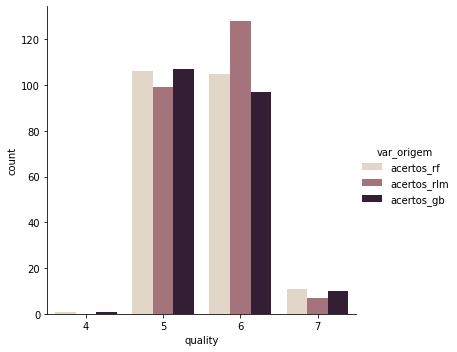

In [63]:
p1=sns.catplot(x="quality",hue="var_origem", kind="count", palette="ch:.25", data=dadosmelt)

plt.show()

## Conclusão

De acordo com os resultados das acurácias dos métodos utilizados para fazer a predição da qualidade dos vinhos no projeto, consideramos que a utilização do método de regressão multipla em relação ao uso do algoritmo Random Forest e do Gradient Boosting é mais cabível pelo fato de gerar uma maior acurácia para a qualificação dos vinhos, tendo em consideração que a precisão da regressão multipla foi de 63.07% enquanto a precissão do Random Forest resultou em 59.15% e a do Gradient Boosting foi de 57.03%, portanto, fica explicito a melhor leitura dos dados por parte da regressão.

Além das acurácias em todos os métodos de precisão serem consideravelmente razoaveis, pode-se concluir que qualquer um desses métodos são utilizaveis para este caso, porém, ainda há uma margem de erro considerável levando em consideração que a maior precisão atingiu o máximo de 62.07% de acertos, portanto, para melhorar a acurácia da classificação dos vihnos seria possível a personalização de novas simplificações ou adições de dados com intuito de deixar o classificador mais apurado, ou também julgar a possibilidade de utilizar um novo algoritmo para gerar novos "outputs" com mais acertos que a regressão.

Todavia, este projeto visa a classificação sobre a qualidade de um vinho tinto, no entanto, este projeto também pode ser útil em questão de gerar a fórmula para bons vinhos a serem feitos, ou seja, observando os dados sobre os ingredientes e sua quantidade nos determinados vinhos é possível a formulação de uma base para os ingredientes indispensáveis para um vinho de alta qualidade, além de mostrar quais são as quantidades de determinados ingredientes que acabam por tornar um vinho de baixa qualidade.